In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.tsatools import detrend
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.decomposition import FastICA
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [5]:
#importing the file and defining the columns I am going to work with:
columnsName_file = ['YYMMMDD', '_north(m)']

filePath1 = '/home/rafaela/internship/time_series/Time-Series-Analysis/Cansiglio Plateau + Classical Karst/brse.txt'
station1 = pd.read_csv(filePath1, usecols = columnsName_file, delimiter = '\s+')

filePath2 = '/home/rafaela/internship/time_series/Time-Series-Analysis/Cansiglio Plateau + Classical Karst/mpra.txt'
station2 = pd.read_csv(filePath2, usecols = columnsName_file, delimiter = '\s+')

filePath3 = '/home/rafaela/internship/time_series/Time-Series-Analysis/Cansiglio Plateau + Classical Karst/pord.txt'
station3 = pd.read_csv(filePath3, usecols = columnsName_file, delimiter = '\s+')

print('BRSE', station1)
print('MPRA', station2)
print('PORD', station3)

BRSE       YYMMMDD  _north(m)
0     10JUN12   0.618030
1     10JUN13   0.621100
2     10JUN14   0.617972
3     10JUN15   0.617000
4     10JUN16   0.621471
...       ...        ...
3053  19JUN30   0.779092
3054  19JUL01   0.780153
3055  19JUL02   0.778882
3056  19JUL03   0.778300
3057  19JUL04   0.779518

[3058 rows x 2 columns]
MPRA       YYMMMDD  _north(m)
0     02AUG09   0.472504
1     02AUG10   0.473255
2     02AUG11   0.472202
3     02AUG12   0.473231
4     02AUG13   0.471035
...       ...        ...
7554  24JAN02   0.834859
7555  24JAN03   0.837236
7556  24JAN04   0.836844
7557  24JAN05   0.835170
7558  24JAN06   0.834913

[7559 rows x 2 columns]
PORD       YYMMMDD  _north(m)
0     06AUG25   0.502569
1     06AUG26   0.499765
2     06AUG27   0.501145
3     06AUG28   0.501418
4     06AUG29   0.502944
...       ...        ...
5869  22DEC27   0.784341
5870  22DEC28   0.784223
5871  22DEC29   0.782839
5872  22DEC30   0.780768
5873  22DEC31   0.783005

[5874 rows x 2 columns]


In [6]:
#changing the dtype of 'YYMMMDD':
station1['YYMMMDD'] = pd.to_datetime(station1['YYMMMDD'], format='%y%b%d')
station2['YYMMMDD'] = pd.to_datetime(station2['YYMMMDD'], format='%y%b%d')
station3['YYMMMDD'] = pd.to_datetime(station3['YYMMMDD'], format='%y%b%d')

#setting 'YYMMMDD' as index:
station1.set_index('YYMMMDD', inplace = True)
station2.set_index('YYMMMDD', inplace = True)
station3.set_index('YYMMMDD', inplace = True)


print('BRSE', station1)
print('MPRA', station2)
print('PORD', station3)

BRSE             _north(m)
YYMMMDD              
2010-06-12   0.618030
2010-06-13   0.621100
2010-06-14   0.617972
2010-06-15   0.617000
2010-06-16   0.621471
...               ...
2019-06-30   0.779092
2019-07-01   0.780153
2019-07-02   0.778882
2019-07-03   0.778300
2019-07-04   0.779518

[3058 rows x 1 columns]
MPRA             _north(m)
YYMMMDD              
2002-08-09   0.472504
2002-08-10   0.473255
2002-08-11   0.472202
2002-08-12   0.473231
2002-08-13   0.471035
...               ...
2024-01-02   0.834859
2024-01-03   0.837236
2024-01-04   0.836844
2024-01-05   0.835170
2024-01-06   0.834913

[7559 rows x 1 columns]
PORD             _north(m)
YYMMMDD              
2006-08-25   0.502569
2006-08-26   0.499765
2006-08-27   0.501145
2006-08-28   0.501418
2006-08-29   0.502944
...               ...
2022-12-27   0.784341
2022-12-28   0.784223
2022-12-29   0.782839
2022-12-30   0.780768
2022-12-31   0.783005

[5874 rows x 1 columns]


In [17]:
#getting the linear model to substract from the original time series:
#BRSE

x1 = np.arange(len(station1)).reshape(-1,1)

#linear trend - NORTH
brse_yN = station1['_north(m)'].values.reshape(-1,1)
brse_linearModelN = LinearRegression().fit(x1,brse_yN)
brse_regressionLineN = brse_linearModelN.predict(x1)

brse_detrendedLinear_north = station1['_north(m)'].values - brse_regressionLineN.flatten()
print(f"BRSE - Linear Detrended (north): {brse_detrendedLinear_north}")

#changig the results to a 'DataFrame' format:
linearDetrended_brseN = pd.DataFrame(brse_detrendedLinear_north, index=station1.index, columns=['brse_north(m)'])

print(f"BRSE - Linear Detrended (north): {linearDetrended_brseN}")

BRSE - Linear Detrended (north): [0.003 0.006 0.003 ... 0.014 0.013 0.014]
BRSE - Linear Detrended (north):             brse_north(m)
YYMMMDD                  
2010-06-12       0.002702
2010-06-13       0.005723
2010-06-14       0.002546
2010-06-15       0.001525
2010-06-16       0.005947
...                   ...
2019-06-30       0.014099
2019-07-01       0.015111
2019-07-02       0.013791
2019-07-03       0.013160
2019-07-04       0.014329

[3058 rows x 1 columns]


In [18]:
#getting the linear model to substract from the original time series:
#MPRA

x2 = np.arange(len(station2)).reshape(-1,1)

#linear trend - NORTH
mpra_yN = station2['_north(m)'].values.reshape(-1,1)
mpra_linearModelN = LinearRegression().fit(x2,mpra_yN)
mpra_regressionLineN = mpra_linearModelN.predict(x2)

mpra_detrendedLinear_north = station2['_north(m)'].values - mpra_regressionLineN.flatten()
print(f"MPRA - Linear Detrended (north): {mpra_detrendedLinear_north}")

#changig the results to a 'DataFrame' format:
linearDetrended_mpraN = pd.DataFrame(mpra_detrendedLinear_north, index=station2.index, columns=['mpra_north(m)'])

print(f"MPRA - Linear Detrended (north): {linearDetrended_mpraN}")

MPRA - Linear Detrended (north): [-0.005 -0.004 -0.005 ...  0.001 -0.001 -0.001]
MPRA - Linear Detrended (north):             mpra_north(m)
YYMMMDD                  
2002-08-09      -0.005007
2002-08-10      -0.004304
2002-08-11      -0.005404
2002-08-12      -0.004423
2002-08-13      -0.006666
...                   ...
2024-01-02      -0.001067
2024-01-03       0.001263
2024-01-04       0.000823
2024-01-05      -0.000898
2024-01-06      -0.001202

[7559 rows x 1 columns]


In [19]:
#getting the linear model to substract from the original time series:
#PORD

x3 = np.arange(len(station3)).reshape(-1,1)

#linear trend - NORTH
pord_yN = station3['_north(m)'].values.reshape(-1,1)
pord_linearModelN = LinearRegression().fit(x3,pord_yN)
pord_regressionLineN = pord_linearModelN.predict(x3)

pord_detrendedLinear_north = station3['_north(m)'].values - pord_regressionLineN.flatten()
print(f"MPRA - Linear Detrended (north): {pord_detrendedLinear_north}")

#changig the results to a 'DataFrame' format:
linearDetrended_pordN = pd.DataFrame(pord_detrendedLinear_north, index=station3.index, columns=['pord_north(m)'])

print(f"MPRA - Linear Detrended (north): {linearDetrended_pordN}")

MPRA - Linear Detrended (north): [ 0.003  0.001  0.002 ...  0.002 -0.     0.002]
MPRA - Linear Detrended (north):             pord_north(m)
YYMMMDD                  
2006-08-25       0.003473
2006-08-26       0.000621
2006-08-27       0.001953
2006-08-28       0.002178
2006-08-29       0.003656
...                   ...
2022-12-27       0.003256
2022-12-28       0.003090
2022-12-29       0.001658
2022-12-30      -0.000461
2022-12-31       0.001728

[5874 rows x 1 columns]


In [20]:
#selecting the outliers and removing them:
limiarZ = 2.0

#BRSE
#NORTH
brseN_linearDet_noOut = linearDetrended_brseN[(np.abs(linearDetrended_brseN-linearDetrended_brseN.mean()) 
                                              < limiarZ*linearDetrended_brseN.std())]
print(f"BRSE - Linear Detrended Outliers Removed (north): {brseN_linearDet_noOut}")

#MPRA
#NORTH
mpraN_linearDet_noOut = linearDetrended_mpraN[(np.abs(linearDetrended_mpraN-linearDetrended_mpraN.mean()) 
                                              < limiarZ*linearDetrended_mpraN.std())]
print(f"MPRA - Linear Detrended Outliers Removed (north): {mpraN_linearDet_noOut}")

#PORD
#NORTH
pordN_linearDet_noOut = linearDetrended_pordN[(np.abs(linearDetrended_pordN-linearDetrended_pordN.mean()) 
                                              < limiarZ*linearDetrended_pordN.std())]
print(f"PORD - Linear Detrended Outliers Removed (north): {pordN_linearDet_noOut}")

BRSE - Linear Detrended Outliers Removed (north):             brse_north(m)
YYMMMDD                  
2010-06-12       0.002702
2010-06-13       0.005723
2010-06-14       0.002546
2010-06-15       0.001525
2010-06-16       0.005947
...                   ...
2019-06-30            NaN
2019-07-01            NaN
2019-07-02            NaN
2019-07-03            NaN
2019-07-04            NaN

[3058 rows x 1 columns]
MPRA - Linear Detrended Outliers Removed (north):             mpra_north(m)
YYMMMDD                  
2002-08-09            NaN
2002-08-10      -0.004304
2002-08-11            NaN
2002-08-12      -0.004423
2002-08-13            NaN
...                   ...
2024-01-02      -0.001067
2024-01-03       0.001263
2024-01-04       0.000823
2024-01-05      -0.000898
2024-01-06      -0.001202

[7559 rows x 1 columns]
PORD - Linear Detrended Outliers Removed (north):             pord_north(m)
YYMMMDD                  
2006-08-25       0.003473
2006-08-26       0.000621
2006-08-27       0.0

In [21]:
#dropping the NaN values

#BRSE
brseN_linearDet_noOut.dropna(inplace=True)
print(f"BRSE - Linear Detrended Outliers Removed (north): {brseN_linearDet_noOut}")

#MPRA
mpraN_linearDet_noOut.dropna(inplace=True)
print(f"MPRA - Linear Detrended Outliers Removed (north): {mpraN_linearDet_noOut}")

#PORD
pordN_linearDet_noOut.dropna(inplace=True)
print(f"PORD - Linear Detrended Outliers Removed (north): {pordN_linearDet_noOut}")

BRSE - Linear Detrended Outliers Removed (north):             brse_north(m)
YYMMMDD                  
2010-06-12       0.002702
2010-06-13       0.005723
2010-06-14       0.002546
2010-06-15       0.001525
2010-06-16       0.005947
...                   ...
2018-12-02      -0.002587
2018-12-03      -0.001694
2018-12-04       0.000195
2018-12-05       0.000832
2019-01-18       0.007754

[2895 rows x 1 columns]
MPRA - Linear Detrended Outliers Removed (north):             mpra_north(m)
YYMMMDD                  
2002-08-10      -0.004304
2002-08-12      -0.004423
2002-08-18      -0.004042
2002-08-20      -0.004279
2002-08-21      -0.002922
...                   ...
2024-01-02      -0.001067
2024-01-03       0.001263
2024-01-04       0.000823
2024-01-05      -0.000898
2024-01-06      -0.001202

[7194 rows x 1 columns]
PORD - Linear Detrended Outliers Removed (north):             pord_north(m)
YYMMMDD                  
2006-08-25       0.003473
2006-08-26       0.000621
2006-08-27       0.0

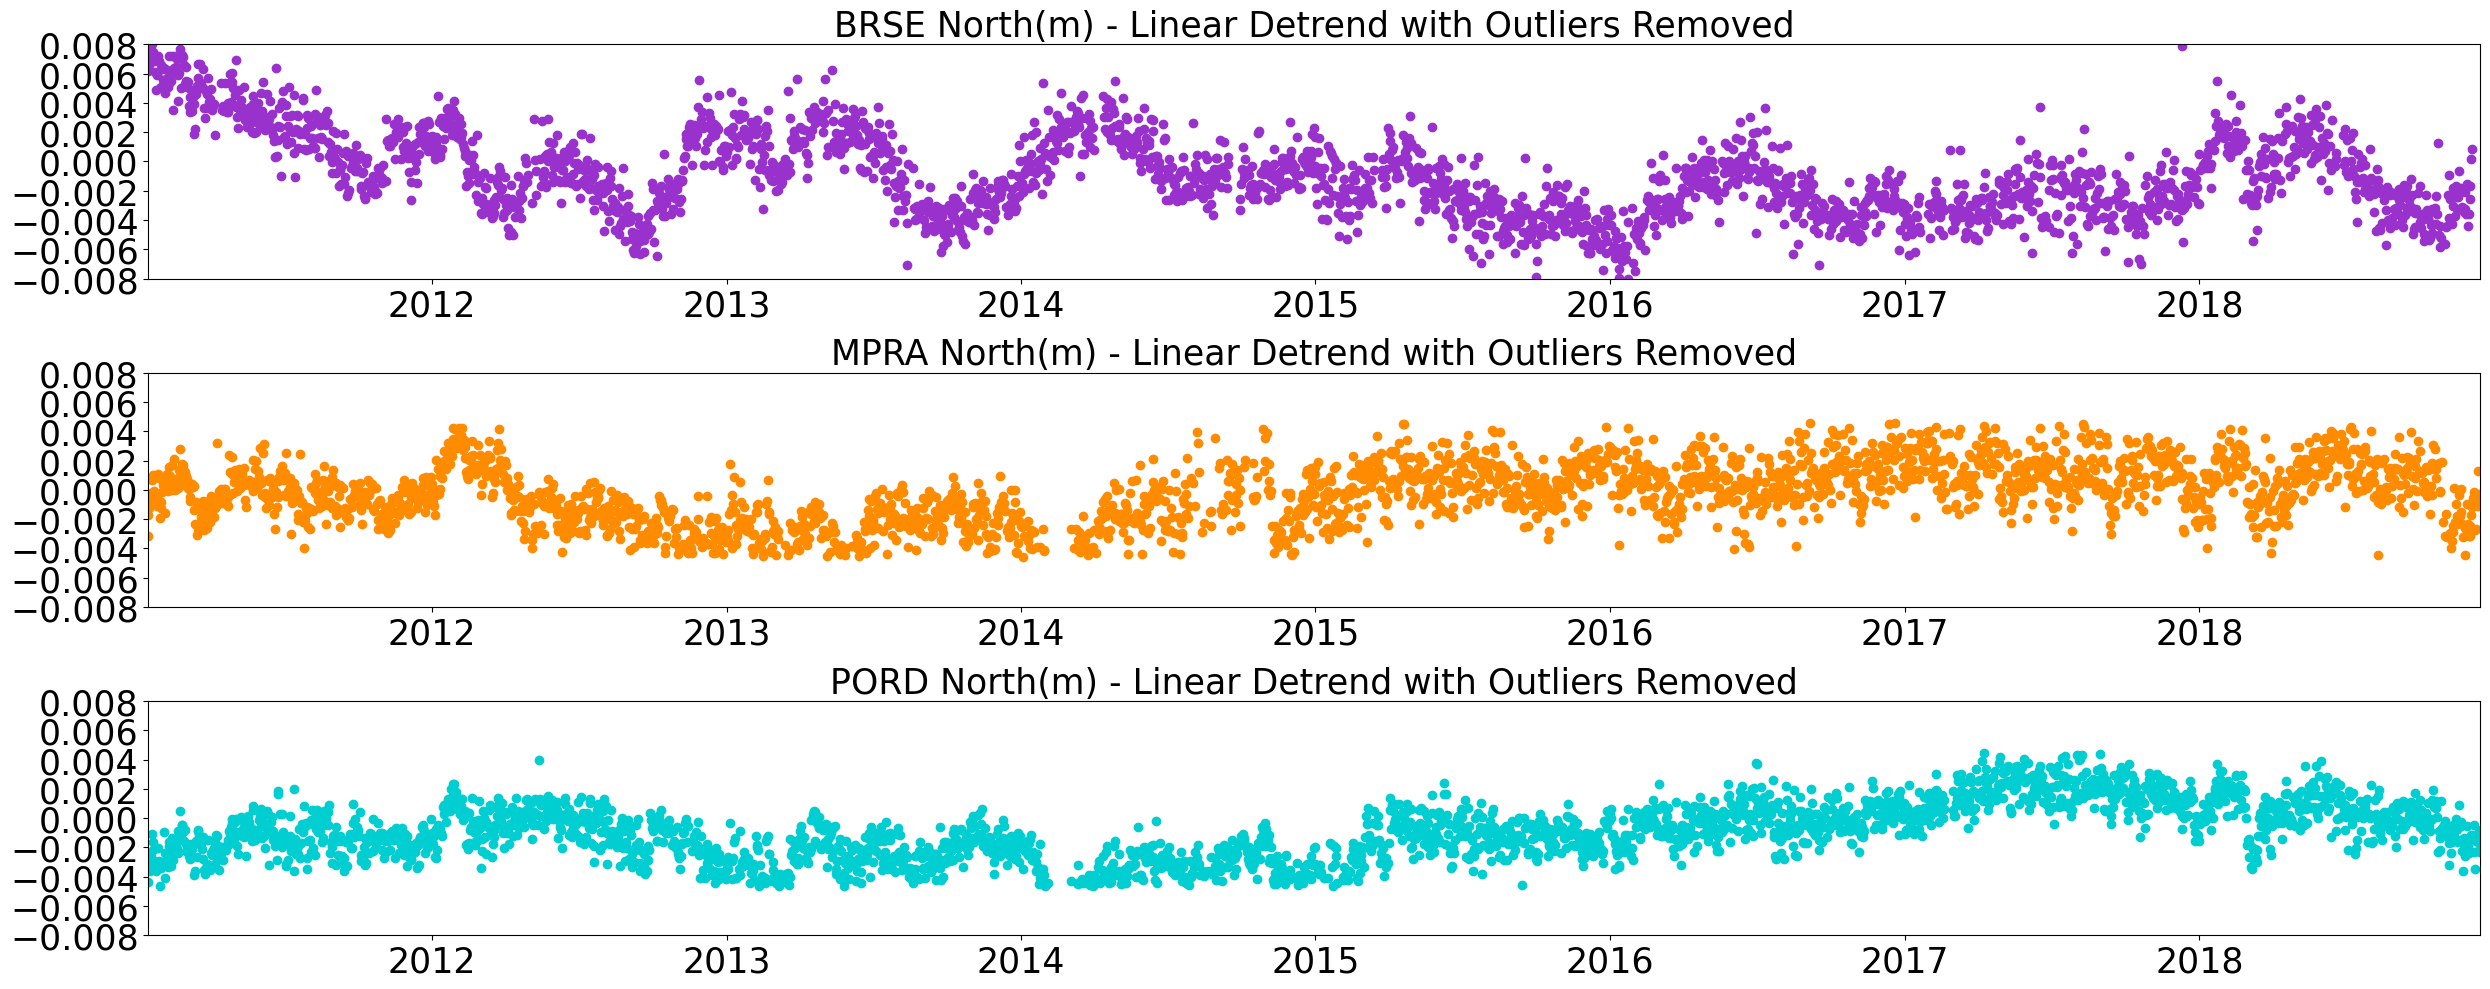

In [22]:
#comparison between NORTH(m) - stations BRSE and MPRA:
fig=plt.figure(figsize=(25,10))

#BRSE
plt.subplot(3, 1, 1)
plt.plot(brseN_linearDet_noOut, 'o', color='darkorchid')
plt.title('BRSE North(m) - Linear Detrend with Outliers Removed', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.008,0.008)
plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-12-15'))

#MPRA
plt.subplot(3, 1, 2)
plt.plot(mpraN_linearDet_noOut, 'o', color='darkorange')
plt.title('MPRA North(m) - Linear Detrend with Outliers Removed', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.008,0.008)
plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-12-15'))

#PORD
plt.subplot(3, 1, 3)
plt.plot(pordN_linearDet_noOut, 'o', color='darkturquoise')
plt.title('PORD North(m) - Linear Detrend with Outliers Removed', fontsize = 25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.008,0.008)
plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-12-15'))

fl = 'brse_mpra_north.svg'
f = io.BytesIO()
#plt.savefig(fl, format="svg")

plt.tight_layout()
plt.show()

In [23]:
#rolling mean 

#BRSE
brse_rolmeanN = brseN_linearDet_noOut.rolling(8, min_periods=1).mean()
print(f"Rolling Mean BRSE north: {brse_rolmeanN}")

#MPRA
mpra_rolmeanN = mpraN_linearDet_noOut.rolling(8, min_periods=1).mean()
print(f"Rolling Mean MPRA north: {mpra_rolmeanN}")

#PORD
pord_rolmeanN = pordN_linearDet_noOut.rolling(8, min_periods=1).mean()
print(f"Rolling Mean MPRA north: {pord_rolmeanN}")

Rolling Mean BRSE north:             brse_north(m)
YYMMMDD                  
2010-06-12       0.002702
2010-06-13       0.004212
2010-06-14       0.003657
2010-06-15       0.003124
2010-06-16       0.003688
...                   ...
2018-12-02      -0.003067
2018-12-03      -0.002846
2018-12-04      -0.002415
2018-12-05      -0.002052
2019-01-18      -0.000631

[2895 rows x 1 columns]
Rolling Mean MPRA north:             mpra_north(m)
YYMMMDD                  
2002-08-10      -0.004304
2002-08-12      -0.004363
2002-08-18      -0.004256
2002-08-20      -0.004262
2002-08-21      -0.003994
...                   ...
2024-01-02       0.000012
2024-01-03       0.000028
2024-01-04       0.000441
2024-01-05       0.000136
2024-01-06       0.000047

[7194 rows x 1 columns]
Rolling Mean MPRA north:             pord_north(m)
YYMMMDD                  
2006-08-25       0.003473
2006-08-26       0.002047
2006-08-27       0.002016
2006-08-28       0.002057
2006-08-29       0.002376
...              

In [24]:
#dropping the NaN values

#BRSE
#NORTH
brseN_linearDet_noOut.dropna(inplace=True)
brse_rolmeanN.dropna(inplace=True)

#MPRA 
#NORTH
mpraN_linearDet_noOut.dropna(inplace=True)
mpra_rolmeanN.dropna(inplace=True)

#PORD
#NORTH
pordN_linearDet_noOut.dropna(inplace=True)
pord_rolmeanN.dropna(inplace=True)

In [25]:
#Mean Squared Error (MSE) and R-Squared Value (R2)

#BRSE
#NORTH
brseN_mse = mean_squared_error(brseN_linearDet_noOut['brse_north(m)'], brse_rolmeanN)
print(f"BRSE north - Mean Squared Error: {brseN_mse}")
brseN_r2 =r2_score(brseN_linearDet_noOut['brse_north(m)'], brse_rolmeanN)
print(f"BRSE north - R-Squared Value: {brseN_r2}")

#MPRA
#NORTH
mpraN_mse = mean_squared_error(mpraN_linearDet_noOut['mpra_north(m)'], mpra_rolmeanN)
print(f"MPRA north - Mean Squared Error: {mpraN_mse}")
mpraN_r2 =r2_score(mpraN_linearDet_noOut['mpra_north(m)'], mpra_rolmeanN)
print(f"MPRA north - R-Squared Value: {mpraN_r2}")

#PORD
#NORTH
pordN_mse = mean_squared_error(pordN_linearDet_noOut['pord_north(m)'], pord_rolmeanN)
print(f"PORD north - Mean Squared Error: {pordN_mse}")
pordN_r2 =r2_score(pordN_linearDet_noOut['pord_north(m)'], pord_rolmeanN)
print(f"PORD north - R-Squared Value: {pordN_r2}")

BRSE north - Mean Squared Error: 1.4857105043399556e-06
BRSE north - R-Squared Value: 0.8148455576786995
MPRA north - Mean Squared Error: 1.3719436772804686e-06
MPRA north - R-Squared Value: 0.6436150553181348
PORD north - Mean Squared Error: 9.022252416232406e-07
PORD north - R-Squared Value: 0.7896020917352033


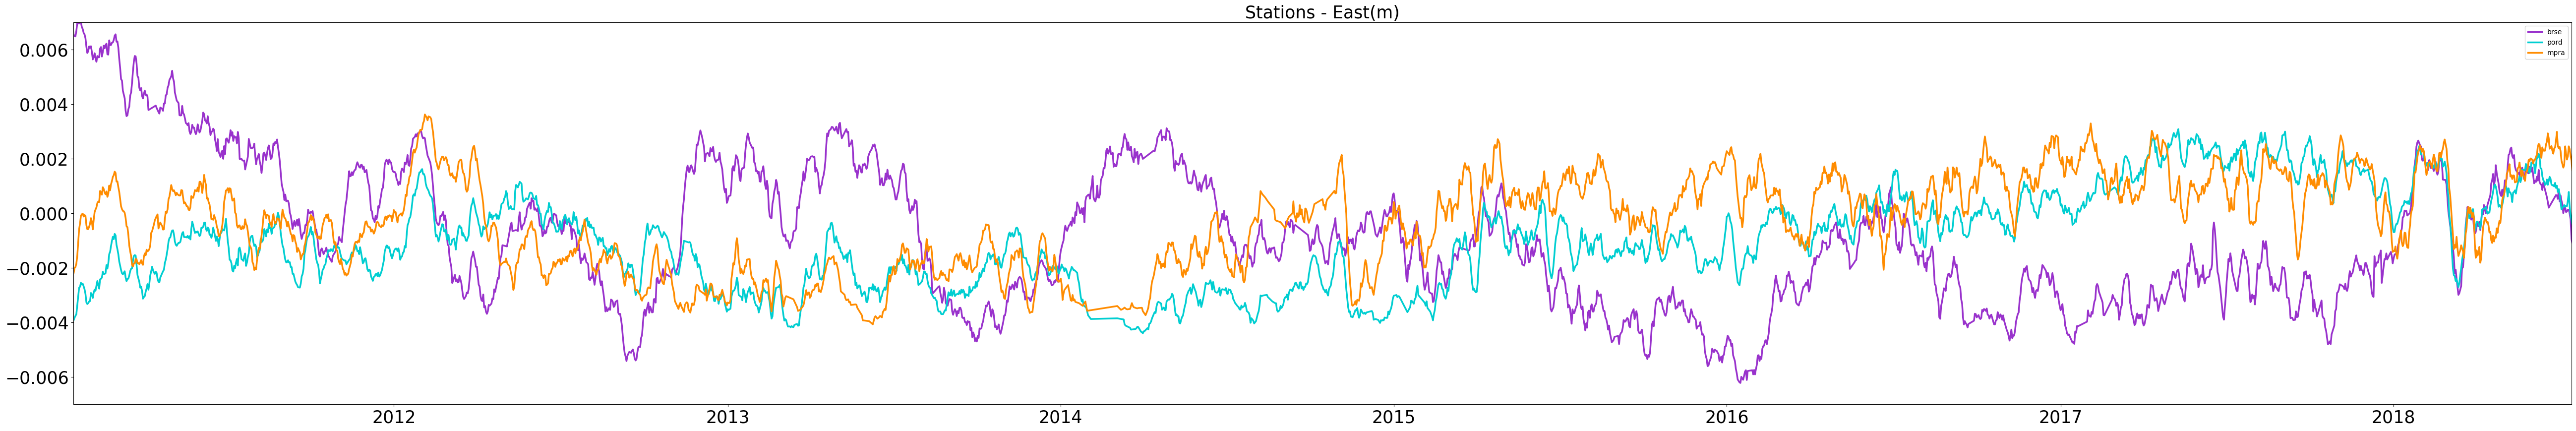

In [27]:
fig=plt.figure(figsize=(65,10))
plt.title('Stations - East(m)', fontsize = 25)

plt.plot(brse_rolmeanN, color='darkorchid', label='brse', lw=2.5)
plt.plot(pord_rolmeanN, color='darkturquoise', label='pord', lw=2.5)
plt.plot(mpra_rolmeanN, color='darkorange', label='mpra', lw=2.5)


plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))
plt.legend(loc='best')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.007,0.007)

fl = 'stations_east.svg'
f = io.BytesIO()
#plt.savefig(fl, format="svg")

plt.show()

In [28]:
stations = pd.concat([brse_rolmeanN, pord_rolmeanN, mpra_rolmeanN], axis=1)
stations = stations.loc['2011-01-15':'2018-07-15']
stations

,brse_north(m),pord_north(m),mpra_north(m)
YYMMMDD,,,
2011-01-15,0.006567,-0.003918,-0.002193
2011-01-16,0.006494,-0.003824,-0.002001
2011-01-17,0.006487,-0.003760,-0.001969
2011-01-18,0.006693,-0.003693,-0.001840
2011-01-19,0.006978,-0.003372,-0.001559
...,...,...,...
2018-07-11,0.000134,0.000470,0.002100
2018-07-12,0.000139,0.000786,0.002458
2018-07-13,-0.000017,0.000246,0.002353


In [29]:
stations['rolling_mean_stations'] = stations[['brse_north(m)', 'pord_north(m)', 'mpra_north(m)']].mean(axis=1).rolling(8, min_periods=1).mean()
stations

,brse_north(m),pord_north(m),mpra_north(m),rolling_mean_stations
YYMMMDD,,,,
2011-01-15,0.006567,-0.003918,-0.002193,0.000152
2011-01-16,0.006494,-0.003824,-0.002001,0.000187
2011-01-17,0.006487,-0.003760,-0.001969,0.000209
2011-01-18,0.006693,-0.003693,-0.001840,0.000254
2011-01-19,0.006978,-0.003372,-0.001559,0.000339
...,...,...,...,...
2018-07-11,0.000134,0.000470,0.002100,0.000816
2018-07-12,0.000139,0.000786,0.002458,0.000851
2018-07-13,-0.000017,0.000246,0.002353,0.000861


In [30]:
print(stations.isnull().sum())

brse_north(m)            164
pord_north(m)            164
mpra_north(m)            213
rolling_mean_stations      0
dtype: int64


In [31]:
pd.options.mode.copy_on_write = True

stations_copy = stations.copy()
stations_copy.dropna(axis=0, inplace=True)
stations_copy

,brse_north(m),pord_north(m),mpra_north(m),rolling_mean_stations
YYMMMDD,,,,
2011-01-15,0.006567,-0.003918,-0.002193,0.000152
2011-01-16,0.006494,-0.003824,-0.002001,0.000187
2011-01-17,0.006487,-0.003760,-0.001969,0.000209
2011-01-18,0.006693,-0.003693,-0.001840,0.000254
2011-01-19,0.006978,-0.003372,-0.001559,0.000339
...,...,...,...,...
2018-07-11,0.000134,0.000470,0.002100,0.000816
2018-07-12,0.000139,0.000786,0.002458,0.000851
2018-07-13,-0.000017,0.000246,0.002353,0.000861


In [32]:
print(stations_copy.isnull().sum())
print(stations_copy[stations_copy.isnull().any(axis=1)])

brse_north(m)            0
pord_north(m)            0
mpra_north(m)            0
rolling_mean_stations    0
dtype: int64
Empty DataFrame
Columns: [brse_north(m), pord_north(m), mpra_north(m), rolling_mean_stations]
Index: []


In [33]:
stations_reduced = pd.DataFrame(index=stations_copy.index, columns=['brse_north(m)', 'pord_north(m)', 'mpra_north(m)'])

stations_reduced['brse_north(m)'] = stations_copy['brse_north(m)'] - stations_copy['rolling_mean_stations']
stations_reduced['pord_north(m)'] = stations_copy['pord_north(m)'] - stations_copy['rolling_mean_stations']
stations_reduced['mpra_north(m)'] = stations_copy['mpra_north(m)'] - stations_copy['rolling_mean_stations']

print(stations_reduced)

            brse_north(m)  pord_north(m)  mpra_north(m)
YYMMMDD                                                
2011-01-15       0.006415      -0.004070      -0.002345
2011-01-16       0.006306      -0.004011      -0.002188
2011-01-17       0.006278      -0.003970      -0.002178
2011-01-18       0.006440      -0.003947      -0.002093
2011-01-19       0.006639      -0.003711      -0.001898
...                   ...            ...            ...
2018-07-11      -0.000682      -0.000346       0.001284
2018-07-12      -0.000712      -0.000065       0.001607
2018-07-13      -0.000878      -0.000615       0.001491
2018-07-14      -0.001084      -0.000928       0.001246
2018-07-15      -0.001733      -0.001036       0.001144

[2272 rows x 3 columns]


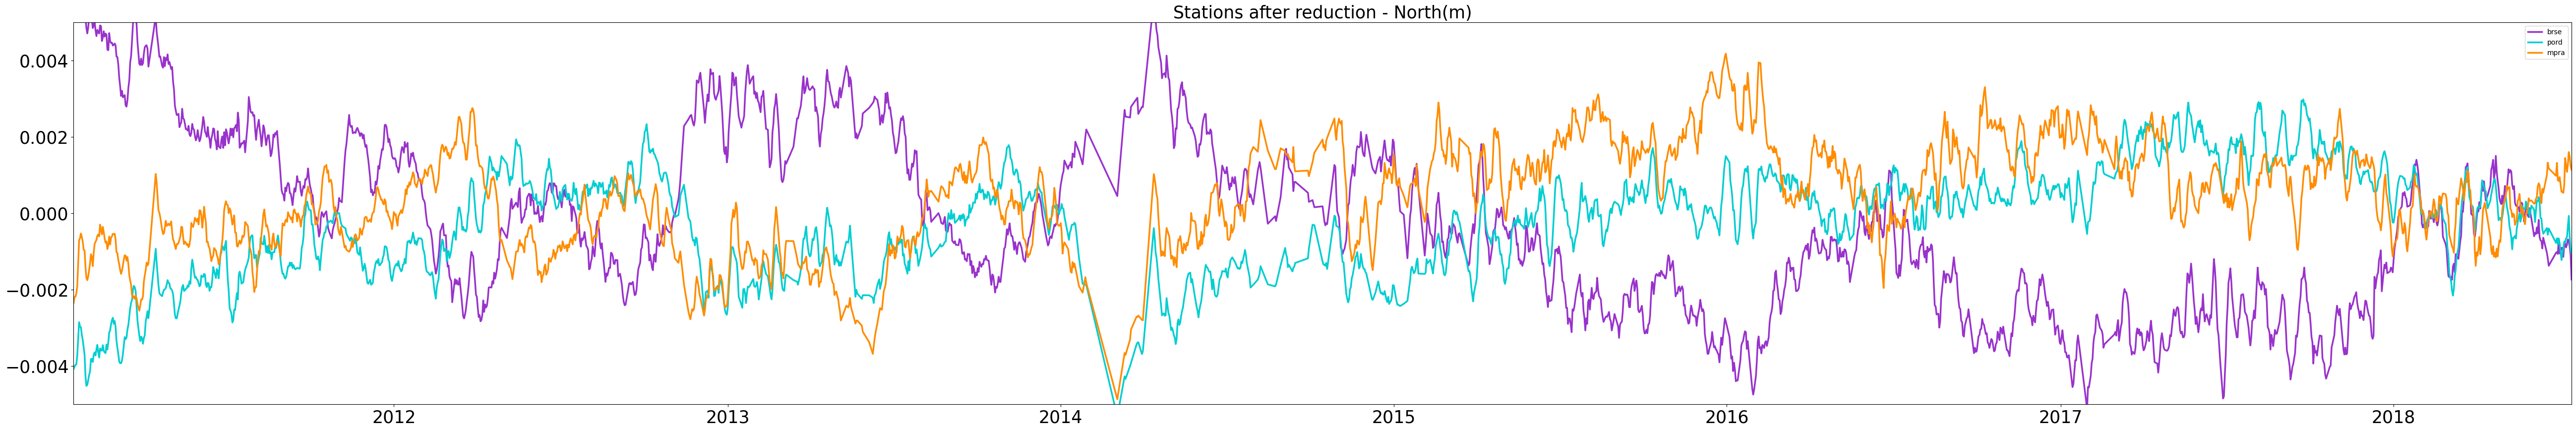

In [35]:
fig=plt.figure(figsize=(65,10))
plt.title('Stations after reduction - North(m)', fontsize = 25)

plt.plot(stations_reduced['brse_north(m)'], color='darkorchid', label='brse', lw=2.5)
plt.plot(stations_reduced['pord_north(m)'], color='darkturquoise', label='pord', lw=2.5)
plt.plot(stations_reduced['mpra_north(m)'], color='darkorange', label='mpra', lw=2.5)

plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

plt.legend(loc='best')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim(-0.005,0.005)

fl = 'stations_reduced_north.svg'
f = io.BytesIO()
plt.savefig(fl, format="svg")

plt.show()